- Nguyễn Bá Trọng
- 20146444
- lớp chiều tối thứ 6 (tiết 11-14)

#2.3 Case tudy 1
#2.3.1 ProtFIS

In [24]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

325.41147741147637


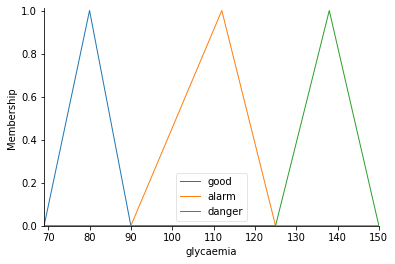

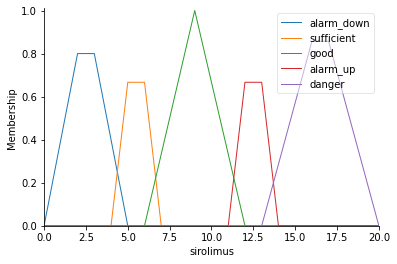

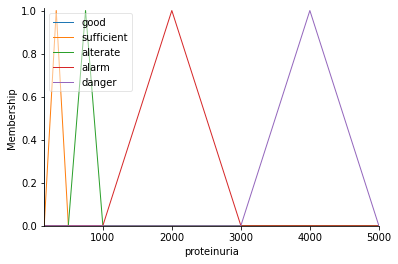

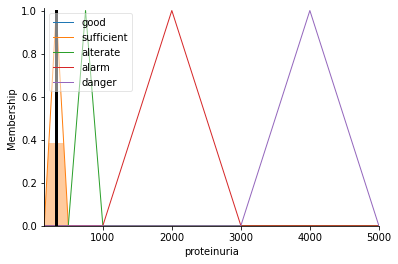

In [8]:
glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0, 21, 1), 'sirolimus')
proteinuria = ctrl.Consequent(np.arange(149, 5001, 1), 'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 80, 90])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [90, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125, 138, 150])

sirolimus['alarm_down'] = fuzz.trimf(sirolimus.universe, [0, 2.5, 5])
sirolimus['sufficient'] = fuzz.trimf(sirolimus.universe, [4, 5.5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe, [6, 9, 12])
sirolimus['alarm_up'] = fuzz.trimf(sirolimus.universe, [11, 12.5, 14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe, [13, 16.5, 20])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [149, 149, 149])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [151, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 4000, 5000])

rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['sufficient'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['sufficient'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_down'], proteinuria['sufficient'])
rule9 = ctrl.Rule(glycaemia['danger'] & sirolimus['sufficient'], proteinuria['alarm'])
rule10 = ctrl.Rule(glycaemia['danger'] & sirolimus['good'], proteinuria['alarm'])
rule11 = ctrl.Rule(glycaemia['danger'] & sirolimus['alarm_up'], proteinuria['danger'])

glycaemia.view()
sirolimus.view()
proteinuria.view()

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
protein = ctrl.ControlSystemSimulation( proteinuria_ctrl)

protein.input['glycaemia'] = 120
protein.input['sirolimus'] = 7.2
protein.compute()


print(protein.output['proteinuria'])
proteinuria.view(sim=protein)

#2.3.2 GfrFIS

75.0


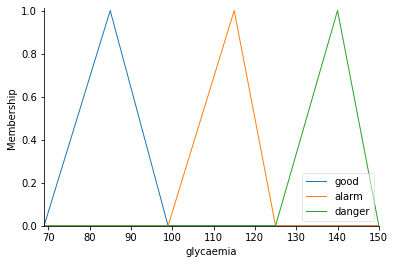

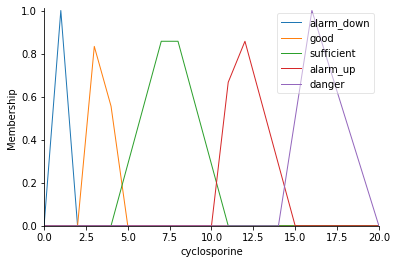

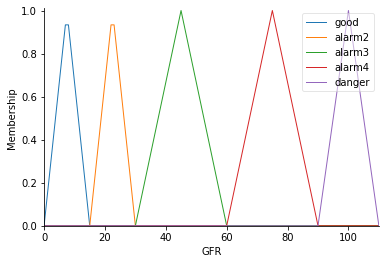

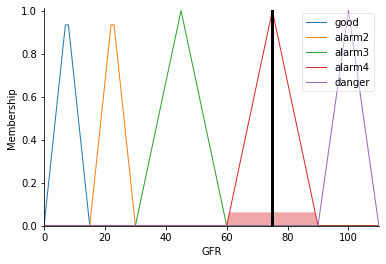

In [16]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0, 21, 1), 'cyclosporine')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 115, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125, 140, 150])

cyclosporine['alarm_down'] = fuzz.trimf(cyclosporine.universe, [0, 1, 2])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe, [2, 3.2, 5])
cyclosporine['sufficient'] = fuzz.trimf(cyclosporine.universe, [4, 7.5, 11])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe, [10, 11.5, 15])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe, [14, 16, 20])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'], GFR['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm_up'], GFR['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['sufficient'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'], GFR['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'], GFR['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'], GFR['alarm3'])
rule8 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['danger'], GFR['alarm4'])
rule9 = ctrl.Rule(glycaemia['good'] & cyclosporine['alarm_up'], GFR['alarm2'])
rule10 = ctrl.Rule(glycaemia['good'] & cyclosporine['alarm_down'], GFR['good'])
rule11 = ctrl.Rule(glycaemia['danger'] & cyclosporine['alarm_down'], GFR['good'])
rule12 = ctrl.Rule(glycaemia['danger'] & cyclosporine['sufficient'], GFR['alarm3'])
rule13 = ctrl.Rule(glycaemia['danger'] & cyclosporine['alarm_up'], GFR['alarm4'])
rule14 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['sufficient'], GFR['alarm2'])
rule15 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm_down'], GFR['alarm2'])

glycaemia.view()
cyclosporine.view()
GFR.view()

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)

gfr.input['glycaemia'] = 100
gfr.input['cyclosporine'] = 16
gfr.compute()

print(gfr.output['GFR'])
GFR.view(sim=gfr)

#2.4 Case study 2
#2.4.1 ProtACE

The proteinuria output: 4000.000000000017 mg/24h --> danger


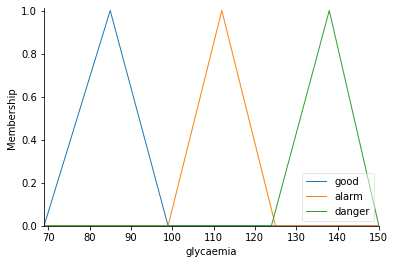

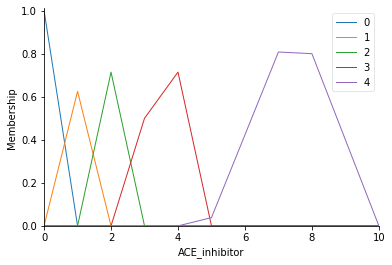

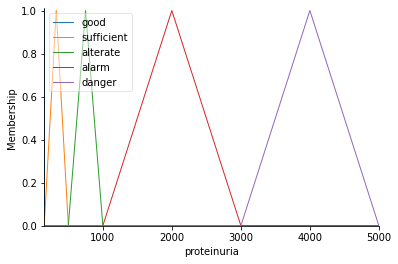

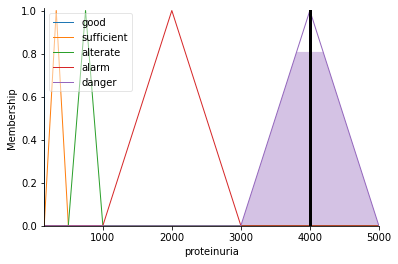

In [18]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
ACE_inhibitor = ctrl.Antecedent(np.arange(0, 11, 1), 'ACE_inhibitor')
proteinuria = ctrl.Consequent(np.arange(149, 5001, 1), 'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 150])

ACE_inhibitor['0'] = fuzz.trimf(ACE_inhibitor.universe, [0, 0, 0.5])
ACE_inhibitor['1'] = fuzz.trimf(ACE_inhibitor.universe, [0.4, 0.85, 1.25])
ACE_inhibitor['2'] = fuzz.trimf(ACE_inhibitor.universe, [1.2, 1.8, 2.5])
ACE_inhibitor['3'] = fuzz.trimf(ACE_inhibitor.universe, [2.4, 3.6, 5])
ACE_inhibitor['4'] = fuzz.trimf(ACE_inhibitor.universe, [4.9, 7.5, 10])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150, 150, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [151, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 4000, 5000])

dir_protein = {'good': [150, 151], 'sufficient': [151, 500], 'alterate': [500, 1000], 'alarm': [1001, 3000], 'danger':[3000, 5000]}

rule1 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['2'], proteinuria['sufficient'])
rule2 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['1'], proteinuria['sufficient'])
rule3 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['1'], proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['1'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['3'], proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['3'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['4'], proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['0'], proteinuria['good'])
rule9 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['4'], proteinuria['danger'])
rule10 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['2'], proteinuria['sufficient'])
rule11 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['4'], proteinuria['alterate'])
rule12 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['0'], proteinuria['sufficient'])
rule13 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['0'], proteinuria['sufficient'])
rule14 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['2'], proteinuria['alterate'])
rule15 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['3'], proteinuria['alarm'])

glycaemia.view()
ACE_inhibitor.view()
proteinuria.view()

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
protein = ctrl.ControlSystemSimulation( proteinuria_ctrl)

protein.input['glycaemia'] = 140
protein.input['ACE_inhibitor'] = 7
protein.compute()
result = protein.output['proteinuria']

for i, value in enumerate(dir_protein):
    if dir_protein[value][0] <= result < dir_protein[value][1]:
        break
    else:
        continue

print('The proteinuria output: {} mg/24h --> {}'.format(protein.output['proteinuria'], value))

proteinuria.view(sim=protein)

#2.4.2 GfrACE

The GFR level: 45.0 mL/min --> alarm3


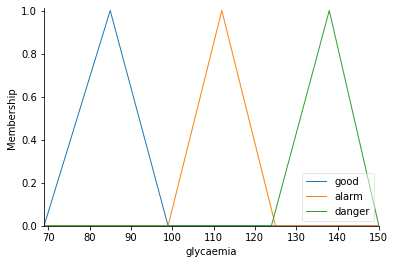

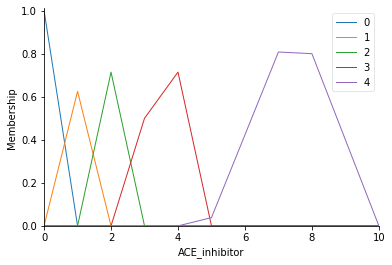

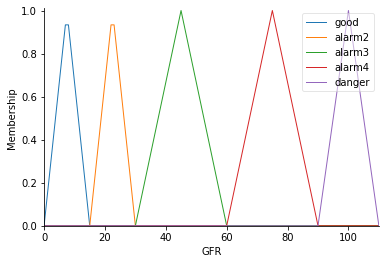

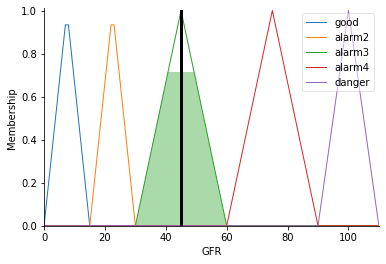

In [23]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
ACE_inhibitor = ctrl.Antecedent(np.arange(0, 11, 1), 'ACE_inhibitor')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 150])

ACE_inhibitor['0'] = fuzz.trimf(ACE_inhibitor.universe, [0, 0, 0.5])
ACE_inhibitor['1'] = fuzz.trimf(ACE_inhibitor.universe, [0.4, 0.85, 1.25])
ACE_inhibitor['2'] = fuzz.trimf(ACE_inhibitor.universe, [1.2, 1.8, 2.5])
ACE_inhibitor['3'] = fuzz.trimf(ACE_inhibitor.universe, [2.4, 3.6, 5])
ACE_inhibitor['4'] = fuzz.trimf(ACE_inhibitor.universe, [4.9, 7.5, 10])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])
dir_GFR = {'good': [0, 15], 'alarm2': [16, 30], 'alarm3': [30, 60], 'alarm4': [60, 90], 'danger':[90, 110]}

rule1 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['2'], GFR['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['2'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['1'], GFR['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['1'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['3'], GFR['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['3'], GFR['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['4'], GFR['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['0'], GFR['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['4'], GFR['danger'])

glycaemia.view()
ACE_inhibitor.view()
GFR.view()

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)

gfr.input['glycaemia'] = 87
gfr.input['ACE_inhibitor'] = 4
gfr.compute()
result = gfr.output['GFR']

for i, value in enumerate(dir_GFR):
    if dir_GFR[value][0] <= result < dir_GFR[value][1]:
        break
    else:
        continue

print('The GFR level: {} mL/min --> {}'.format(result, value))

GFR.view(sim=gfr)